<a href="https://colab.research.google.com/github/muditsatija08/genetic-evolution/blob/main/E_Question3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing Deap
!pip install deap

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
# importing libraries
import operator
import math
import random

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp


import matplotlib.pyplot as plt

import itertools
import networkx as nx

In [ ]:
# Genetic Programming constants:
POPULATION_SIZE = 1000
P_CROSSOVER = 0.9
P_MUTATION = 0.01
MAX_GENERATIONS = 100
HALL_OF_FAME_SIZE = 10

In [ ]:
#Initialization
RANDOM_SEED = 412
random.seed(RANDOM_SEED)

In [ ]:
MIN_TREE_HEIGHT = 3
MAX_TREE_HEIGHT = 5
LIMIT_TREE_HEIGHT = 5
MUT_MIN_TREE_HEIGHT = 0
MUT_MAX_TREE_HEIGHT = 2

In [ ]:
NUM_INPUTS = 3
NUM_COMBINATIONS = 2 ** NUM_INPUTS

In [ ]:
# def nand(x,y):
#   return not(x and y)
# def nor(x,y):
#   return not(x or y)
# def xor(x,y):
#   return (x ^ y)


In [ ]:
# calculate the truth table of even parity check:
parityIn = list(itertools.product([0, 1], repeat=NUM_INPUTS))
parityOut = []
for row in parityIn:
    parityOut.append(sum(row) % 2)

# calculate the difference between the results of the
# generated function and the expected parity results:
def parityError(individual):
    func = toolbox.compile(expr=individual)
    return sum(func(*pIn) != pOut for pIn, pOut in zip(parityIn, parityOut))

# fitness measure:
def getCost(individual):
    return parityError(individual),  # return a tuple

**Setup 1:** Calculating the GP performance for fewer number of primituves with just the three basic logic gates.

In [ ]:
# create the primitive set:
primitiveSet = gp.PrimitiveSet("main", NUM_INPUTS, "in_")
primitiveSet.addPrimitive(operator.and_, 2)
primitiveSet.addPrimitive(operator.or_, 2)
primitiveSet.addPrimitive(operator.not_, 1)


# add terminal values:
primitiveSet.addTerminal(1)
primitiveSet.addTerminal(0)

In [ ]:
toolbox = base.Toolbox()

# define a single objective, minimizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# create the Individual class based on the primitive tree:
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

# create a helper function for creating random trees using the primitive set:
toolbox.register("expr", gp.genFull, pset=primitiveSet, min_=MIN_TREE_HEIGHT, max_=MAX_TREE_HEIGHT)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.expr)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

# create an operator to compile the primitive tree into python code:
toolbox.register("compile", gp.compile, pset=primitiveSet)

toolbox.register("evaluate", getCost)

# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=7)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genGrow, min_=MUT_MIN_TREE_HEIGHT, max_=MUT_MAX_TREE_HEIGHT)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=primitiveSet)

# bloat control:
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=LIMIT_TREE_HEIGHT))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=LIMIT_TREE_HEIGHT))

In [ ]:
population= toolbox.populationCreator(n=POPULATION_SIZE)
# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)


In [ ]:
stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", numpy.mean)
mstats.register("std", numpy.std)
mstats.register("min", numpy.min)
mstats.register("max", numpy.max)

In [ ]:
population, logbook = algorithms.eaSimple(population,
                                                  toolbox,
                                                  cxpb=P_CROSSOVER,
                                                  mutpb=P_MUTATION,
                                                  ngen=MAX_GENERATIONS,
                                                  stats=mstats,
                                                  halloffame=hof,
                                                  verbose=True)

   	      	                    fitness                     	                      size                     
   	      	------------------------------------------------	-----------------------------------------------
gen	nevals	avg  	gen	max	min	nevals	std     	avg  	gen	max	min	nevals	std    
0  	1000  	4.003	0  	5  	2  	1000  	0.327095	19.66	0  	56 	4  	1000  	11.4295
1  	902   	3.834	1  	5  	2  	902   	0.431792	18.665	1  	56 	1  	902   	11.109 
2  	892   	3.522	2  	5  	2  	892   	0.561708	20.49 	2  	50 	1  	892   	10.3771
3  	910   	3.319	3  	6  	2  	910   	0.60765 	22.616	3  	48 	1  	910   	9.98982
4  	869   	3.135	4  	6  	2  	869   	0.717478	22.564	4  	47 	1  	869   	8.72467
5  	875   	2.856	5  	6  	2  	875   	0.808247	21.814	5  	47 	2  	875   	6.5998 
6  	935   	2.683	6  	6  	2  	935   	0.797816	21.029	6  	40 	2  	935   	5.49692
7  	915   	2.695	7  	6  	2  	915   	0.846153	20.825	7  	43 	1  	915   	5.62427
8  	907   	2.648	8  	6  	2  	907   	0.801309	20.727	8  	43 	2  	907   	5.66

Operators used for setup1: and, or, not
-- Best Individual =  and_(or_(and_(not_(not_(in_1)), not_(in_2)), and_(or_(in_0, not_(in_1)), or_(in_2, or_(in_2, in_0)))), and_(or_(or_(not_(in_0), not_(in_1)), in_2), or_(not_(in_2), or_(not_(in_0), and_(in_1, in_2)))))
-- length=35, height=5
-- Best Fitness =  0.0


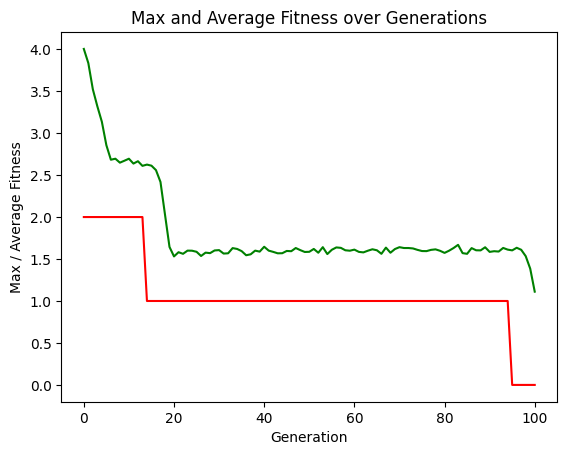

In [ ]:
#Setup 1
maxFitnessValues, meanFitnessValues = logbook.chapters['fitness'].select("min", "avg")
# print info for best solution found:
best = hof.items[0]
print('Operators used for setup1: and, or, not')
print("-- Best Individual = ", best)
print("-- length={}, height={}".format(len(best), best.height))
print("-- Best Fitness = ", best.fitness.values[0])

plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average Fitness over Generations')
plt.show()

**Setup 2:** Calculating the GP performance with maximum number of primitives which includes the universal gates.

In [ ]:
# # calculate the truth table of even parity check:
# parityIn_S2 = list(itertools.product([0, 1], repeat=NUM_INPUTS))
# parityOut_S2 = []
# for row in parityIn_S2:
#     parityOut_S2.append(sum(row) % 2)

# # calculate the difference between the results of the
# # generated function and the expected parity results:
# def parityError_S2(individual):
#     func = toolbox.compile(expr=individual)
#     return sum(func(*pIn) != pOut for pIn, pOut in zip(parityIn_S2, parityOut_S2))

# # fitness measure:
# def getCost_S2(individual):
#     # nodes, edges, labels = gp.graph(individual)
#     return parityError_S2(individual),  # return a tuple

In [ ]:
# create the primitive set:
primitiveSet = gp.PrimitiveSet("main", NUM_INPUTS, "in_")
primitiveSet.addPrimitive(operator.and_, 2)
primitiveSet.addPrimitive(operator.or_, 2)
primitiveSet.addPrimitive(operator.not_, 1)
primitiveSet.addPrimitive(nor, 2)
primitiveSet.addPrimitive(nand, 2)


# add terminal values:
primitiveSet.addTerminal(1)
primitiveSet.addTerminal(0)

In [ ]:
toolbox = base.Toolbox()

# define a single objective, minimizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# create the Individual class based on the primitive tree:
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

# create a helper function for creating random trees using the primitive set:
toolbox.register("expr", gp.genFull, pset=primitiveSet, min_=MIN_TREE_HEIGHT, max_=MAX_TREE_HEIGHT)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.expr)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

# create an operator to compile the primitive tree into python code:
toolbox.register("compile", gp.compile, pset=primitiveSet)

toolbox.register("evaluate", getCost_S2)

# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=7)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genGrow, min_=MUT_MIN_TREE_HEIGHT, max_=MUT_MAX_TREE_HEIGHT)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=primitiveSet)

# bloat control:
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=LIMIT_TREE_HEIGHT))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=LIMIT_TREE_HEIGHT))

In [ ]:
population = toolbox.populationCreator(n=POPULATION_SIZE)
# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

In [ ]:
stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", numpy.mean)
mstats.register("std", numpy.std)
mstats.register("min", numpy.min)
mstats.register("max", numpy.max)

In [ ]:
population, logbook = algorithms.eaSimple(population,
                                                  toolbox,
                                                  cxpb=P_CROSSOVER,
                                                  mutpb=P_MUTATION,
                                                  ngen=MAX_GENERATIONS,
                                                  stats=mstats,
                                                  halloffame=hof,
                                                  verbose=True)

   	      	                    fitness                     	                      size                     
   	      	------------------------------------------------	-----------------------------------------------
gen	nevals	avg  	gen	max	min	nevals	std     	avg   	gen	max	min	nevals	std    
0  	1000  	4.009	0  	5  	2  	1000  	0.361827	25.434	0  	62 	4  	1000  	14.5158
1  	890   	3.775	1  	5  	2  	890   	0.506335	24.287	1  	61 	2  	890   	14.0481
2  	886   	3.372	2  	5  	2  	886   	0.624192	27.831	2  	60 	2  	886   	14.0787
3  	914   	3.055	3  	5  	2  	914   	0.681157	30.868	3  	60 	4  	914   	12.4935
4  	903   	2.703	4  	6  	2  	903   	0.759468	32.928	4  	60 	2  	903   	11.0533
5  	926   	2.534	5  	6  	1  	926   	0.779002	35.021	5  	56 	5  	926   	10.3739
6  	892   	2.47 	6  	6  	1  	892   	0.719097	35.408	6  	56 	9  	892   	9.98787
7  	895   	2.492	7  	6  	1  	895   	0.734803	35.511	7  	56 	8  	895   	10.0375
8  	917   	2.48 	8  	6  	1  	917   	0.74135 	35.23 	8  	56 	1  	917   	10

Operators used for setup2: and, or, not, nor, nand
-- Best Individual =  and_(nand(nor(and_(in_1, in_0), and_(and_(in_2, in_2), nor(in_1, in_0))), or_(in_2, or_(nor(in_1, in_0), in_2))), nand(nor(not_(in_1), nor(in_1, and_(in_1, in_2))), and_(not_(in_2), or_(nand(1, in_1), in_0))))
-- length=37, height=5
-- Best Fitness =  0.0


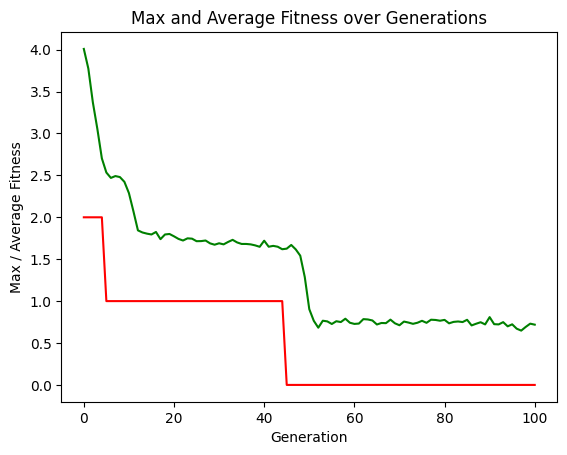

In [ ]:
# #Setup 2
maxFitnessValues, meanFitnessValues = logbook.chapters['fitness'].select("min", "avg")
# print info for best solution found:
best = hof.items[0]
print('Operators used for setup2: and, or, not, nor, nand')
print("-- Best Individual = ", best)
print("-- length={}, height={}".format(len(best), best.height))
print("-- Best Fitness = ", best.fitness.values[0])

plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average Fitness over Generations')
plt.show()

**Setup 3:** Calculating the GP performance without the universal gates

In [ ]:
# # calculate the truth table of even parity check:
# parityIn_S3 = list(itertools.product([0, 1], repeat=NUM_INPUTS))
# parityOut_S3 = []
# for row in parityIn_S3:
#     parityOut_S3.append(sum(row) % 2)

# # calculate the difference between the results of the
# # generated function and the expected parity results:
# def parityError_S3(individual):
#     func = toolbox.compile(expr=individual)
#     return sum(func(*pIn) != pOut for pIn, pOut in zip(parityIn_S3, parityOut_S3))

# # fitness measure:
# def getCost_S3(individual):
#     # nodes, edges, labels = gp.graph(individual)
#     return parityError_S3(individual),  # return a tuple

In [ ]:
# create the primitive set:
primitiveSet = gp.PrimitiveSet("main", NUM_INPUTS, "in_")
primitiveSet.addPrimitive(operator.and_, 2)
primitiveSet.addPrimitive(operator.or_, 2)
primitiveSet.addPrimitive(operator.xor, 2)
primitiveSet.addPrimitive(operator.not_, 1)


# add terminal values:
primitiveSet.addTerminal(1)
primitiveSet.addTerminal(0)

In [ ]:
toolbox = base.Toolbox()

# define a single objective, minimizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# create the Individual class based on the primitive tree:
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

# create a helper function for creating random trees using the primitive set:
toolbox.register("expr", gp.genFull, pset=primitiveSet, min_=MIN_TREE_HEIGHT, max_=MAX_TREE_HEIGHT)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.expr)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

# create an operator to compile the primitive tree into python code:
toolbox.register("compile", gp.compile, pset=primitiveSet)

toolbox.register("evaluate", getCost)

# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genGrow, min_=MUT_MIN_TREE_HEIGHT, max_=MUT_MAX_TREE_HEIGHT)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=primitiveSet)

# bloat control:
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=LIMIT_TREE_HEIGHT))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=LIMIT_TREE_HEIGHT))

In [ ]:
population = toolbox.populationCreator(n=POPULATION_SIZE)
# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

In [ ]:
stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", numpy.mean)
mstats.register("std", numpy.std)
mstats.register("min", numpy.min)
mstats.register("max", numpy.max)

In [ ]:
population, logbook = algorithms.eaSimple(population,
                                                  toolbox,
                                                  cxpb=P_CROSSOVER,
                                                  mutpb=P_MUTATION,
                                                  ngen=MAX_GENERATIONS,
                                                  stats=mstats,
                                                  halloffame=hof,
                                                  verbose=True)

   	      	                    fitness                     	                      size                     
   	      	------------------------------------------------	-----------------------------------------------
gen	nevals	avg  	gen	max	min	nevals	std     	avg   	gen	max	min	nevals	std    
0  	1000  	3.955	0  	8  	0  	1000  	0.716223	21.766	0  	60 	4  	1000  	12.4998
1  	904   	3.772	1  	8  	0  	904   	0.766822	20.876	1  	56 	1  	904   	12.1988
2  	918   	3.581	2  	8  	0  	918   	0.922735	21.71 	2  	56 	1  	918   	12.4645
3  	892   	3.319	3  	8  	0  	892   	1.09692 	23.405	3  	54 	1  	892   	12.2529
4  	883   	3.007	4  	8  	0  	883   	1.22676 	24.882	4  	54 	2  	883   	12.4148
5  	911   	2.784	5  	8  	0  	911   	1.2959  	25.995	5  	53 	2  	911   	11.9313
6  	894   	2.63 	6  	8  	0  	894   	1.38315 	26.511	6  	53 	1  	894   	12.1114
7  	900   	2.423	7  	8  	0  	900   	1.45742 	27.368	7  	55 	2  	900   	11.8814
8  	900   	2.327	8  	8  	0  	900   	1.60439 	27.877	8  	55 	1  	900   	12

Operators used for setup3: and, or, not, xor
-- Best Individual =  xor(xor(xor(or_(and_(in_0, 1), xor(in_1, in_1)), xor(in_1, in_2)), in_1), not_(and_(or_(1, 1), xor(1, in_1))))
-- length=22, height=5
-- Best Fitness =  0.0


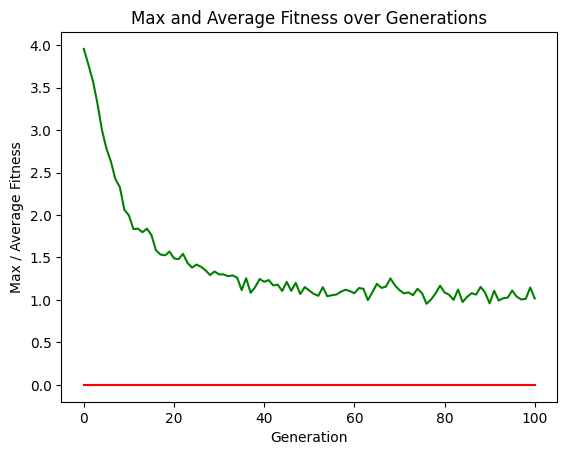

In [ ]:
#Setup 3
maxFitnessValues, meanFitnessValues = logbook.chapters['fitness'].select("min", "avg")
# print info for best solution found:
best = hof.items[0]
print('Operators used for setup3: and, or, not, xor')
print("-- Best Individual = ", best)
print("-- length={}, height={}".format(len(best), best.height))
print("-- Best Fitness = ", best.fitness.values[0])

plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average Fitness over Generations')
plt.show()